In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dateutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# Import data

fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv', index_col=0)
fr_filt = pd.read_csv(r'..\data\processed\filtered_raw_data.csv', index_col=0)
fr_norm = pd.read_csv(r'..\data\processed\run_1_median_linregress_normalized_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_groupings.csv')

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1060, 1092, 1062, 1093, 1101, 1102, 1074, 1076, 1082]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

,0,1,2,3,4,5,6,7,8,9,...,1473,1479,1480,1481,1482,1483,1484,1486,rat_label,bg_type
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),1.145548e+07,4.677270e+07,1.625939e+07,1.290199e+08,1.089197e+07,1.933989e+08,2.044391e+09,3.911514e+05,6.825097e+06,1.069831e+08,...,2.374953e+06,1.009094e+06,1.695971e+06,6.585959e+05,1.801313e+06,1.053780e+06,5.844701e+05,4.172293e+05,1060.0,FBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),1.728814e+07,5.522238e+07,3.238113e+07,6.760284e+07,1.697296e+07,1.685820e+08,4.234264e+09,4.231877e+05,5.076570e+06,1.380264e+08,...,1.606961e+06,3.590850e+05,2.521954e+05,3.591638e+05,1.867413e+05,7.649254e+04,2.637219e+05,1.935145e+05,1060.0,RBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),1.620891e+07,4.636132e+07,2.424065e+07,2.097893e+08,1.411260e+07,1.976960e+08,2.277230e+09,5.282407e+05,6.153004e+06,1.163225e+08,...,3.425511e+06,1.478886e+06,2.084620e+06,6.962952e+05,2.262484e+06,1.532065e+06,4.822433e+05,3.182338e+05,1060.0,FBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),2.381849e+07,3.699951e+07,9.969525e+06,2.170599e+08,5.828327e+06,7.780203e+07,9.474041e+08,3.177282e+05,7.656925e+06,5.256910e+07,...,1.648307e+06,5.292559e+05,3.282916e+05,4.957885e+05,2.249304e+05,9.603305e+04,3.785893e+05,2.218873e+05,1060.0,RBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),1.396265e+07,2.186571e+07,1.224058e+07,1.517546e+08,7.216628e+06,7.340653e+07,8.894795e+08,2.945614e+05,5.584367e+06,4.536340e+07,...,1.224029e+06,2.809178e+05,8.838342e+05,2.268937e+05,1.017417e+06,7.220460e+05,1.172392e+05,1.552374e+04,1060.0,FBG
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210408_10wk_RBG.raw (F8),1.222901e+07,3.143719e+07,2.428798e+07,2.321839e+08,1.110572e+07,1.128582e+08,1.598987e+09,4.484599e+05,3.024460e+06,9.202207e+07,...,1.598547e+06,4.578285e+05,1.921003e+05,3.742060e+05,1.673797e+05,4.768530e+04,2.973711e+05,2.005374e+05,1060.0,RBG
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),1.049443e+07,2.537288e+07,1.402438e+07,1.187355e+08,6.906003e+06,8.068469e+07,1.338627e+09,2.933464e+05,4.245591e+06,7.975980e+07,...,7.498958e+05,1.952125e+05,6.713921e+05,1.696026e+05,6.228681e+05,3.955002e+05,8.184697e+04,8.400065e+04,1062.0,FBG
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),7.822806e+06,1.570121e+07,1.428936e+07,1.913929e+08,6.922304e+06,5.853739e+07,1.622974e+09,3.731273e+05,6.153203e+06,9.289272e+07,...,2.919200e+06,1.073021e+06,7.017587e+05,5.502279e+05,6.014441e+05,1.172183e+05,8.610503e+05,5.191814e+05,1062.0,RBG
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),1.580575e+07,8.711962e+06,2.507414e+07,2.456139e+08,1.370329e+07,7.282328e+07,1.814210e+09,2.601523e+05,7.476980e+06,1.158570e+08,...,1.428733e+06,7.870235e+05,3.781001e+05,6.239018e+05,3.012837e+05,7.378381e+04,5.009631e+05,3.184388e+05,1062.0,RBG
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210405_10wk_FBG.raw (F15),1.293988e+07,2.562288e+07,1.064783e+07,1.932585e+08,6.667398e+06,8.262612e+07,1.200713e+09,2.528383e+05,6.790469e+06,6.227456e+07,...,1.680257e+06,8.664182e+05,1.237521e+06,5.595982e+05,1.123475e+06,5.925132e+05,2.663724e+05,2.282466e+05,1062.0,FBG


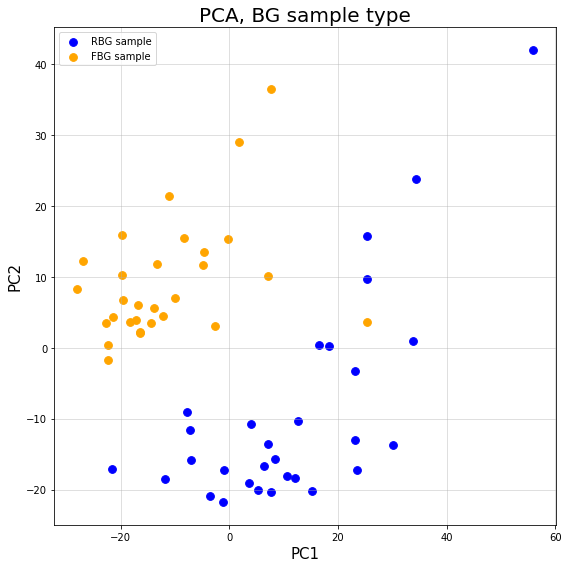

In [37]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, BG sample type', fontsize = 20)
targets = ['RBG', 'FBG']
target_colors = ['blue', 'orange']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, color in zip(targets, target_colors):
    scatter_points = pca_data[(pca_data['bg_type'] == target)] 
    ax.scatter(scatter_points['pc1'],
               scatter_points['pc2'],
               c = color,
               cmap='viridis',
               s = 60)
ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\PCA colored by BG method.png')

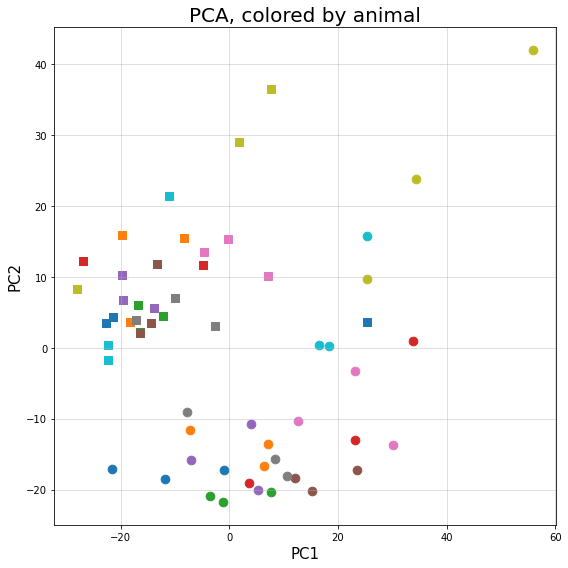

In [40]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

# display(pca_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, colored by animal', fontsize = 20)
targets = ['RBG', 'FBG']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, marker in zip(targets, markers):
    for label, color in zip(animals_used, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target) & (pca_data['rat_label'] == label)]
#         print(scatter_points)
        ax.scatter(scatter_points['pc1'],
                   scatter_points['pc2'],
                   c = color,
#                    cmap='viridis',
                   marker=marker,
                   s = 75,
                   )
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\PCA colored by animal.png')  

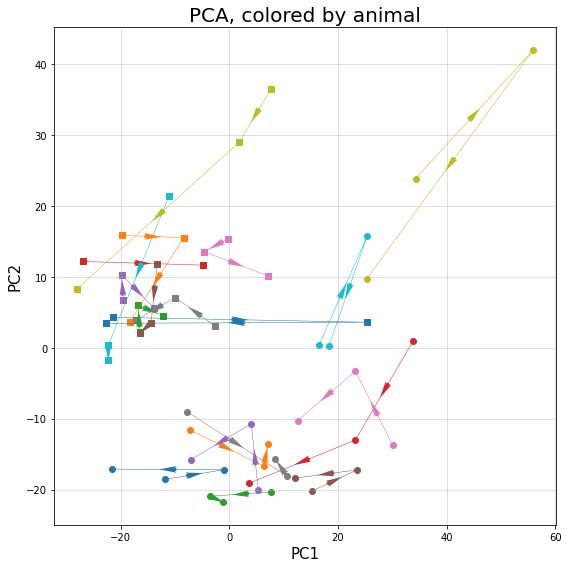

In [97]:
df = fr_filt

pca_data = df.drop(df.filter(regex='Blank|Water|QC1|QC2').columns, axis=1).filter(regex='.raw').T

# Populate rat_label and bg_type columns in PCA df from file_grouping
# (pd.merge() is similar to inner join in SQL) 
pca_data = pd.merge(pca_data, 
                    file_grouping[['fr_name', 'rat_label', 'bg_type']],
                    how='inner', 
                    left_on=pca_data.index, 
                    right_on='fr_name',)\
                    .set_index(pca_data.index).drop('fr_name', axis=1)

n_components = 2
pca = PCA(n_components=n_components)

# Standard scaler is a little important for PCA
scaled = StandardScaler().fit_transform(pca_data.drop(['bg_type', 'rat_label'], axis=1))
fitted = pca.fit_transform(scaled)
# auto-name PCA columns as pc1, pc2... based on n_components
columns = ['pc' + str(x) for x in range(1, n_components + 1)]
fitted = pd.DataFrame(fitted, columns=columns)

# restore the bg and rat labels into the df
pca_data = pd.concat([fitted, pca_data.reset_index()[['bg_type', 'rat_label']]], axis=1)

# display(pca_data)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA, colored by animal', fontsize = 20)
targets = ['RBG', 'FBG']
markers = ['o', 's']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
# colors = [plt.get_cmap('Dark2')(i) for i in range(1, 11)]

for target, marker in zip(targets, markers):
    for label, color in zip(animals_used, colors):
        scatter_points = pca_data[(pca_data['bg_type'] == target) & (pca_data['rat_label'] == label)]
#         print(scatter_points)
        ax.scatter(scatter_points['pc1'],
                   scatter_points['pc2'],
                   c = color,
#                    cmap='viridis',
                   marker=marker,
#                    s = 75,
                   )
        # Adding arrows connecting each mouse from week 8 to 9 to 10 using ax.quiver()
        # https://stackoverflow.com/questions/58342419/show-direction-arrows-in-a-scatterplot
        
        x = scatter_points['pc1'].values
        y = scatter_points['pc2'].values
        
        x_diff = np.diff(x)
        y_diff = np.diff(y)
        
        pos_x = x[:-1] + x_diff/2
        pos_y = y[:-1] + y_diff/2
                
        norm = np.sqrt(x_diff**2 + y_diff**2)
        
        ax.quiver(pos_x, pos_y, x_diff/norm, y_diff/norm, angles='xy', zorder=5, pivot='mid', 
                  color=color,
                  linewidth=0.01,
#                   linestyle='-',
                  scale=30,
                  headwidth=2,
                 )
        plt.plot(x, y, linewidth=0.5)
    
        
# ax.legend(['RBG sample', 'FBG sample'],)
ax.grid(alpha=0.5)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\PCA colored by animal.png')  

(array([[  0.,   9.,  43., 124., 139., 153., 172., 222., 272.,   2.],
        [ 22., 116., 159., 164., 112., 101., 125., 132., 126.,  79.]]),
 array([-0.04754088, -0.03652007, -0.02549926, -0.01447845, -0.00345764,
         0.00756317,  0.01858398,  0.02960479,  0.0406256 ,  0.05164641,
         0.06266722]),
 <a list of 2 BarContainer objects>)

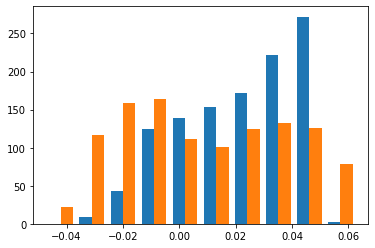

In [98]:
## LOADINGS PLOT OF PCA
plt.hist(pca.components_.T)

In [99]:
pca.explained_variance_

array([336.62610657, 230.25616134])

(array([ 12.,  35.,  79., 123., 106., 113., 130., 152., 241., 145.]),
 array([-0.59696445, -0.44064972, -0.284335  , -0.12802028,  0.02829445,
         0.18460917,  0.3409239 ,  0.49723862,  0.65355335,  0.80986807,
         0.9661828 ]),
 <BarContainer object of 10 artists>)

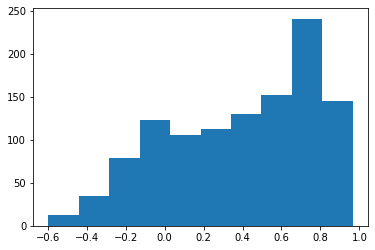

In [100]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.hist(loadings[:, 0])